In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# Dataset from seaborn
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


Text(0, 0.5, 'Signal Change')

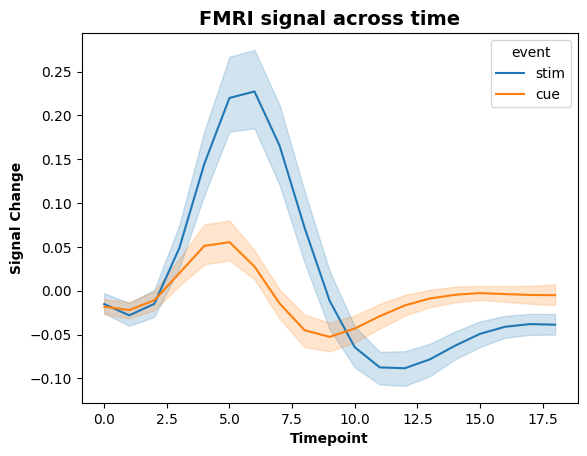

In [78]:
# Plotting the line chart using SEABORN
sns.lineplot(data=fmri, x='timepoint', y='signal', hue="event", color='black', ms=10)

plt.title("FMRI signal across time", fontsize=14, weight = 'bold' )

#Labelling the x, and y axix
plt.xlabel("Timepoint", fontsize=10, weight = 'bold')
plt.ylabel("Signal Change", fontsize=10, weight = 'bold')

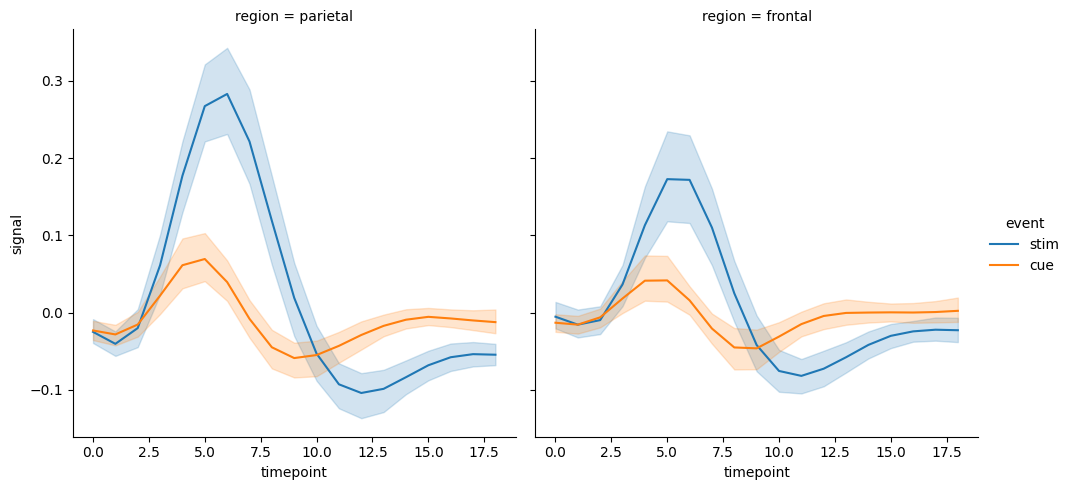

In [79]:
#relplot 
sns.relplot(data=fmri, x='timepoint', y='signal', hue="event", kind="line", col="region", color='black', ms=10)

Importing different dataset - "FLIGHTS"

In [80]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


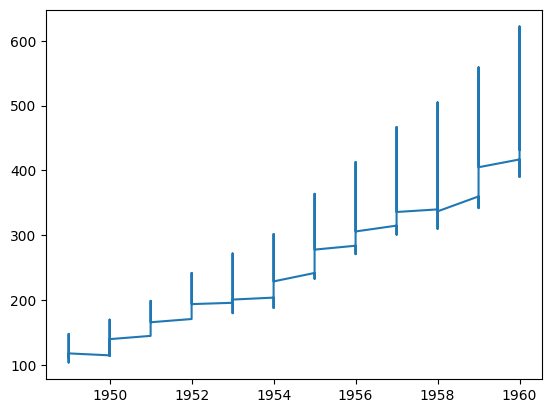

In [81]:
# Plotting the line chart using MATPLOTLIB - plots in literally
plt.plot(flights.year, flights.passengers)

Text(0, 0.5, 'Passengers')

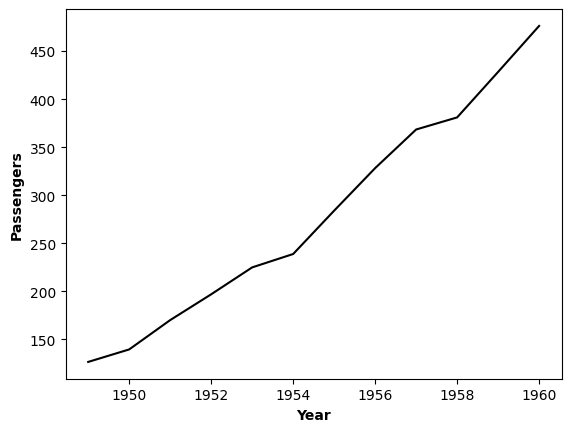

In [82]:
# Plotting the line chart using SEABORN - aggregating the data for us automatically
sns.lineplot(data=flights, x='year', y='passengers',errorbar=None, color='black', ms=10)

#Labelling the x, and y axix
plt.xlabel("Year", fontsize=10, weight = 'bold')
plt.ylabel("Passengers", fontsize=10, weight = 'bold')


In [100]:
# Pivoted the table into a wide format
fp = flights.pivot(index ='year', columns='month', values='passengers')
fp


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot: xlabel='month', ylabel='year'>

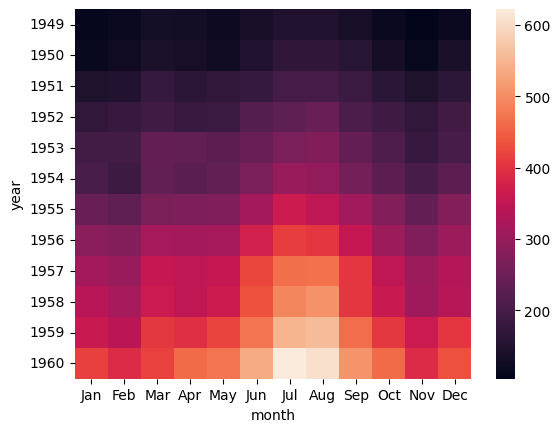

In [103]:
# Creating a heatmap 
sns.heatmap(fp)

Importing different dataset - "tips"

In [83]:
# Importing tip dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: xlabel='day', ylabel='total_bill'>

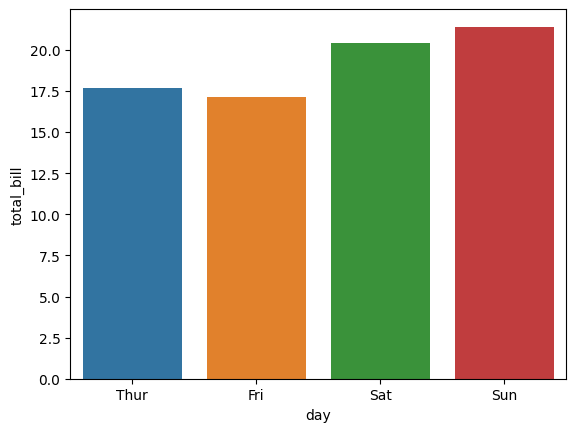

In [84]:
# Plotting the bar chart using SEABORN - aggregating the data for us automatically
#[Average]
sns.barplot(data=tips, x='day', y='total_bill', errorbar=None)

<AxesSubplot: xlabel='total_bill', ylabel='day'>

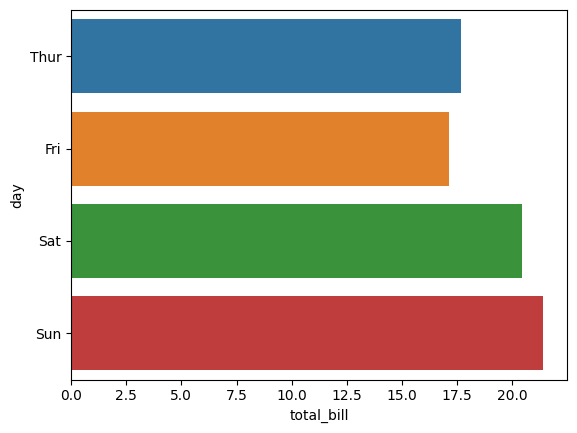

In [85]:
# Plotting the bar chart using SEABORN - aggregating the data for us automatically
sns.barplot(data=tips, x='total_bill', y='day', errorbar=None)

Text(0, 0.5, 'Total_bill')

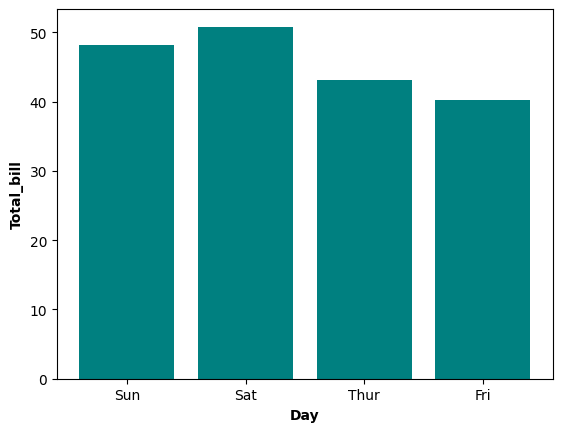

In [86]:
# Plotting the bar chart using MATPLOTLIB - aggregating the data for us automatically
plt.bar(tips.day, tips.total_bill, color='teal')

#Labelling the x, and y axix
plt.xlabel("Day", fontsize=10, weight = 'bold')
plt.ylabel("Total_bill", fontsize=10, weight = 'bold')



In [87]:
tips.groupby("day")["total_bill"].max()

day
Thur    43.11
Fri     40.17
Sat     50.81
Sun     48.17
Name: total_bill, dtype: float64

Exercise

Create a stacked bar chart showing the proportional contribution of each group size to the total bill for each day

 .reset_index() turn it into a dataframe

In [88]:
total_bill_per_day = tips.groupby('day')['total_bill'].sum().reset_index
total_bill_per_day

<bound method Series.reset_index of day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64>

In [89]:
group_bill_per_day = tips.groupby(['day','size'])['total_bill'].sum().reset_index()
group_bill_per_day

,day,size,total_bill
0,Thur,1,10.07
1,Thur,2,727.53
2,Thur,3,76.64
3,Thur,4,149.75
4,Thur,5,41.19
5,Thur,6,91.15
6,Fri,1,8.58
7,Fri,2,261.15
8,Fri,3,15.98
9,Fri,4,40.17


In [91]:
# # bar chart 1 -> top bars (group of 'smoker=No')
# bar1 = sns.barplot(x="day",  y="total_bill", data=total_bill_per_day, hue="size", color='darkblue')


# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# bar2 = sns.barplot(x="day", y="total_bill", data=group_bill_per_day, color='lightblue')

# plt.show()


importing a new dataset - iris

In [92]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


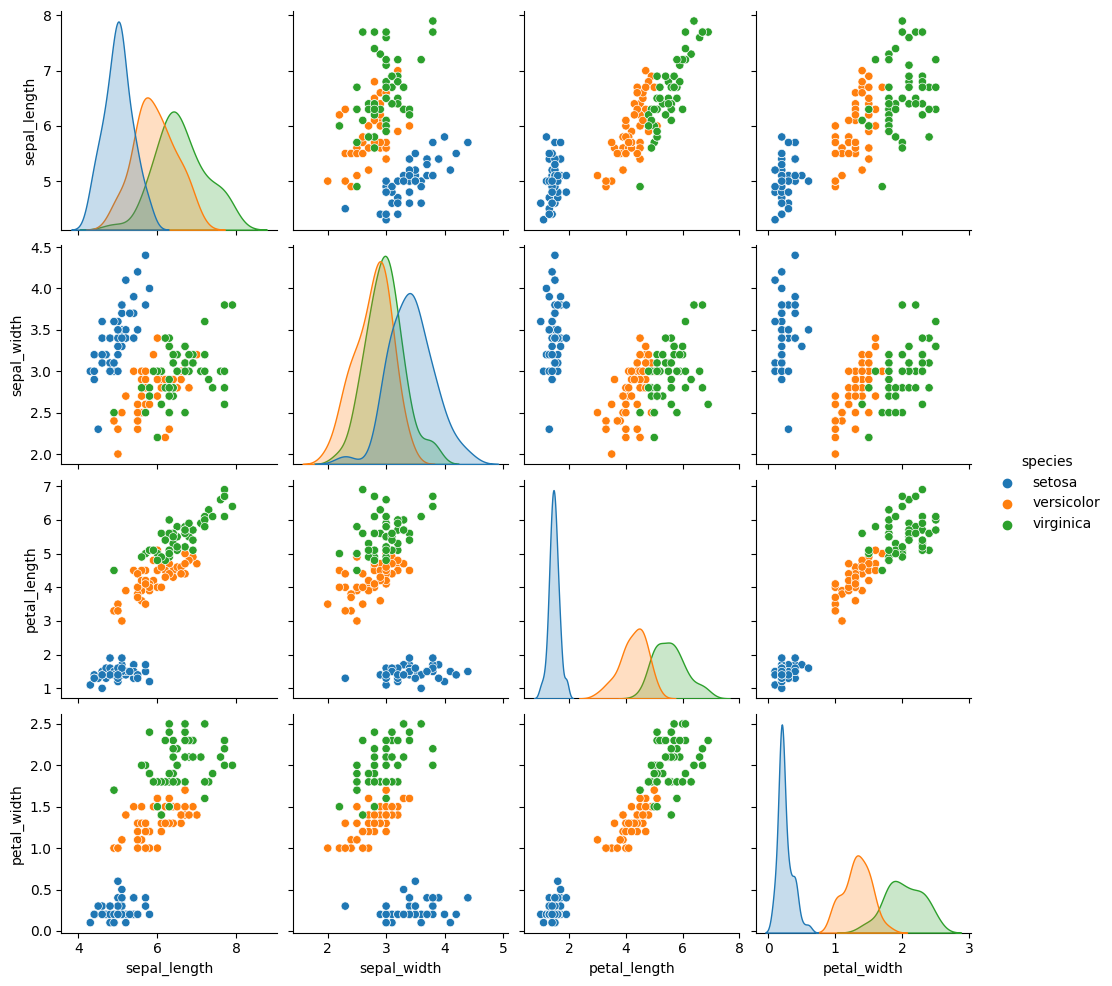

In [98]:
# Plotting a pairs plot which gives us overview of the data
sns.pairplot(iris, hue="species")